# Gradient descent & implementation to linear regression

In this notebook I am creating from scratch (and without the use of machine learning libraries) a gradient descent algorithm, to minimize the cost function $J(\vec{w},b)$ and compute the best parameters for linear regression. For these examples we could use the normal equation, solve for the solution matrix and compute the exact solution. This would be easier, but the intent of this algorithm is to create from zero a gradient descent algorithm and to test it.

# Libraries & tools

In [1]:
# Importing functions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import copy

# Enable interactive plot
%matplotlib notebook

In [2]:
def animate_func(num):
    # Auxiliar function for FuncAnimation. It's used to plot a animated
    # function to see how the cost function evolves through time
    
    # Clears the figure to update the line, point, title, and axes    
    ax.clear()  
        
    #Updating Trajectory Line (num+1 due to Python indexing)
    ax.plot(dataset[0, :num+1], dataset[1, :num+1], c='blue')    
    
    # Updating Point Location 
    ax.scatter(dataset[0, num], dataset[1, num], c='blue', marker='o')    
    
    # Adding Constant Origin
    ax.plot(dataset[0, 0], dataset[1, 0], c='black', marker='o')    
    
    # Setting Axes Limits
    #ax.set_xlim([-1, 1])
    plot_ymax = min(dataset[1, :num+1].min()*100,dataset[1, :num+1].max())
    plot_ymin = dataset[1, :num+1].min()
    plot_ydelta = plot_ymax-plot_ymin
    
    ax.set_ylim([plot_ymin-plot_ydelta*0.05,plot_ymax+plot_ydelta*0.05])

    # Adding Figure Labels
    ax.set_title('i = ' + str(int(num*len(J)/plot_points)) + ', J = ' + str(round(J[int(num*len(J)/plot_points)],3)))
    ax.set_xlabel('Iteration')
    ax.set_ylabel('J')


# Linear Regression

We will choose the cost function equal to the squared error of our prediction, which we can write as
$$J(w,b)=\frac{1}{2m}\sum_{i=1}^m(b+\vec{w}\cdot\vec{x}^{(i)}-y^{(i)})^2$$

In [3]:
def compute_cost(X,y,w,b):
    cost = np.sum((np.matmul(X,w)+b-y)**2)/(2*X.shape[0])
    return cost

We can then compute the gradient using the formula
$$ \frac{\partial J}{\partial w_j} = \sum_{i=1}^{m}(b+\vec{w}\cdot\vec{x}^{(i)}-y^{(i)})x_j^{(i)}$$
$$ \frac{\partial J}{\partial b} =\sum_{i=1}^{m}(b+\vec{w}\cdot\vec{x}^{(i)}-y^{(i)})$$

In [4]:
def compute_gradient(X,y,w,b):
    #Vectorized formula to compute the gradients
    dj_dw = np.matmul(X.T,np.matmul(X,w)+b-y)
    dj_db = np.sum(np.matmul(X,w)+b-y)
    return dj_dw, dj_db

Now we apply gradient descent, which is a constant iteration where we update the parameters in the opposite direction of the gradient, i.e. $$w_j \rightarrow w_j-\alpha\frac{1}{m}\sum_{i=1}^{m}(b+\vec{w}\cdot\vec{x}^{(i)}-y^{(i)})x_j^{(i)}$$
$$b \rightarrow b-\alpha\frac{1}{m}\sum_{i=1}^{m}(b+\vec{w}\cdot\vec{x}^{(i)}-y^{(i)})$$

In [5]:
def gradient_descent(X,y,w,b,alpha,iterations,visual=False,points=None):
    m = X.shape[0]
    
    if visual == False:
    # Gradient_descent with NO visualization
    
        # Algorithm
        for i in range(iterations):
            dj_dw, dj_db = compute_gradient(X,y,w,b)
        
            w -= alpha*dj_dw/m
            b -= alpha*dj_db/m
            
            # Print the process if asked
            try:
                if (i%points==0):
                    print(f"J(i) reached a value of {compute_cost(X,y,w,b):.3f} at {i}.")
            except TypeError:
                pass
            
            
        print(f"The solution found is w = {w.reshape(1,-1).round(2)}, b = {b:.2f}. Final cost = {compute_cost(X,y,w,b):.2f}.")    
    
    else:
    # Gradient_descent WITH visualization
        global line_ani, ax, dataset, J, plot_points # Neccessary for animated visualization
        plot_points = 100 if points is None else points
        
        J = np.zeros(iterations+1)
        J[0] = compute_cost(X,y,w,b)
        for i in range(iterations):
            dj_dw, dj_db = compute_gradient(X,y,w,b)
        
            w -= alpha*dj_dw/m
            b -= alpha*dj_db/m
            
            J[i+1] = compute_cost(X,y,w,b)
     
        print(f"The solution found is w = {w.reshape(1,-1).round(2)}, b = {b:.2f}. Final cost = {compute_cost(X,y,w,b):.2f}.")    
    
        # Setting up Data Set for Animation
        J_len = int(len(J)/plot_points)
        J_plot = list(J[0:-1:J_len])
        dataset = np.array([np.array(range(0,iterations,J_len)), J_plot])  # Combining our position coordinates
        numDataPoints = len(J)

        # Plotting the Animation
        fig = plt.figure(figsize=(9.5,6), dpi= 100)
        fig.suptitle('Evolution of the Cost Function J(i) through each iteration.')
        ax = plt.subplot(1,2,1)
        line_ani = animation.FuncAnimation(fig, animate_func, interval=100,   
                                           frames=numDataPoints,blit=True,repeat=False)

        threshold = int(iterations/10)
        ax2 = plt.subplot(1,2,2)
        ax2.plot(range(len(J)-threshold,len(J)), J[-threshold:], c='blue')     
        ax2.set_title(f"J(i) for the last {threshold} iterations.")
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('J')        
        plt.show()
    
    return w,b

# TEST EXAMPLES

The real solution is w = [[2]], b = 10.00
The solution found is w = [[2.01]], b = 9.80. Final cost = 0.01.


<IPython.core.display.Javascript object>


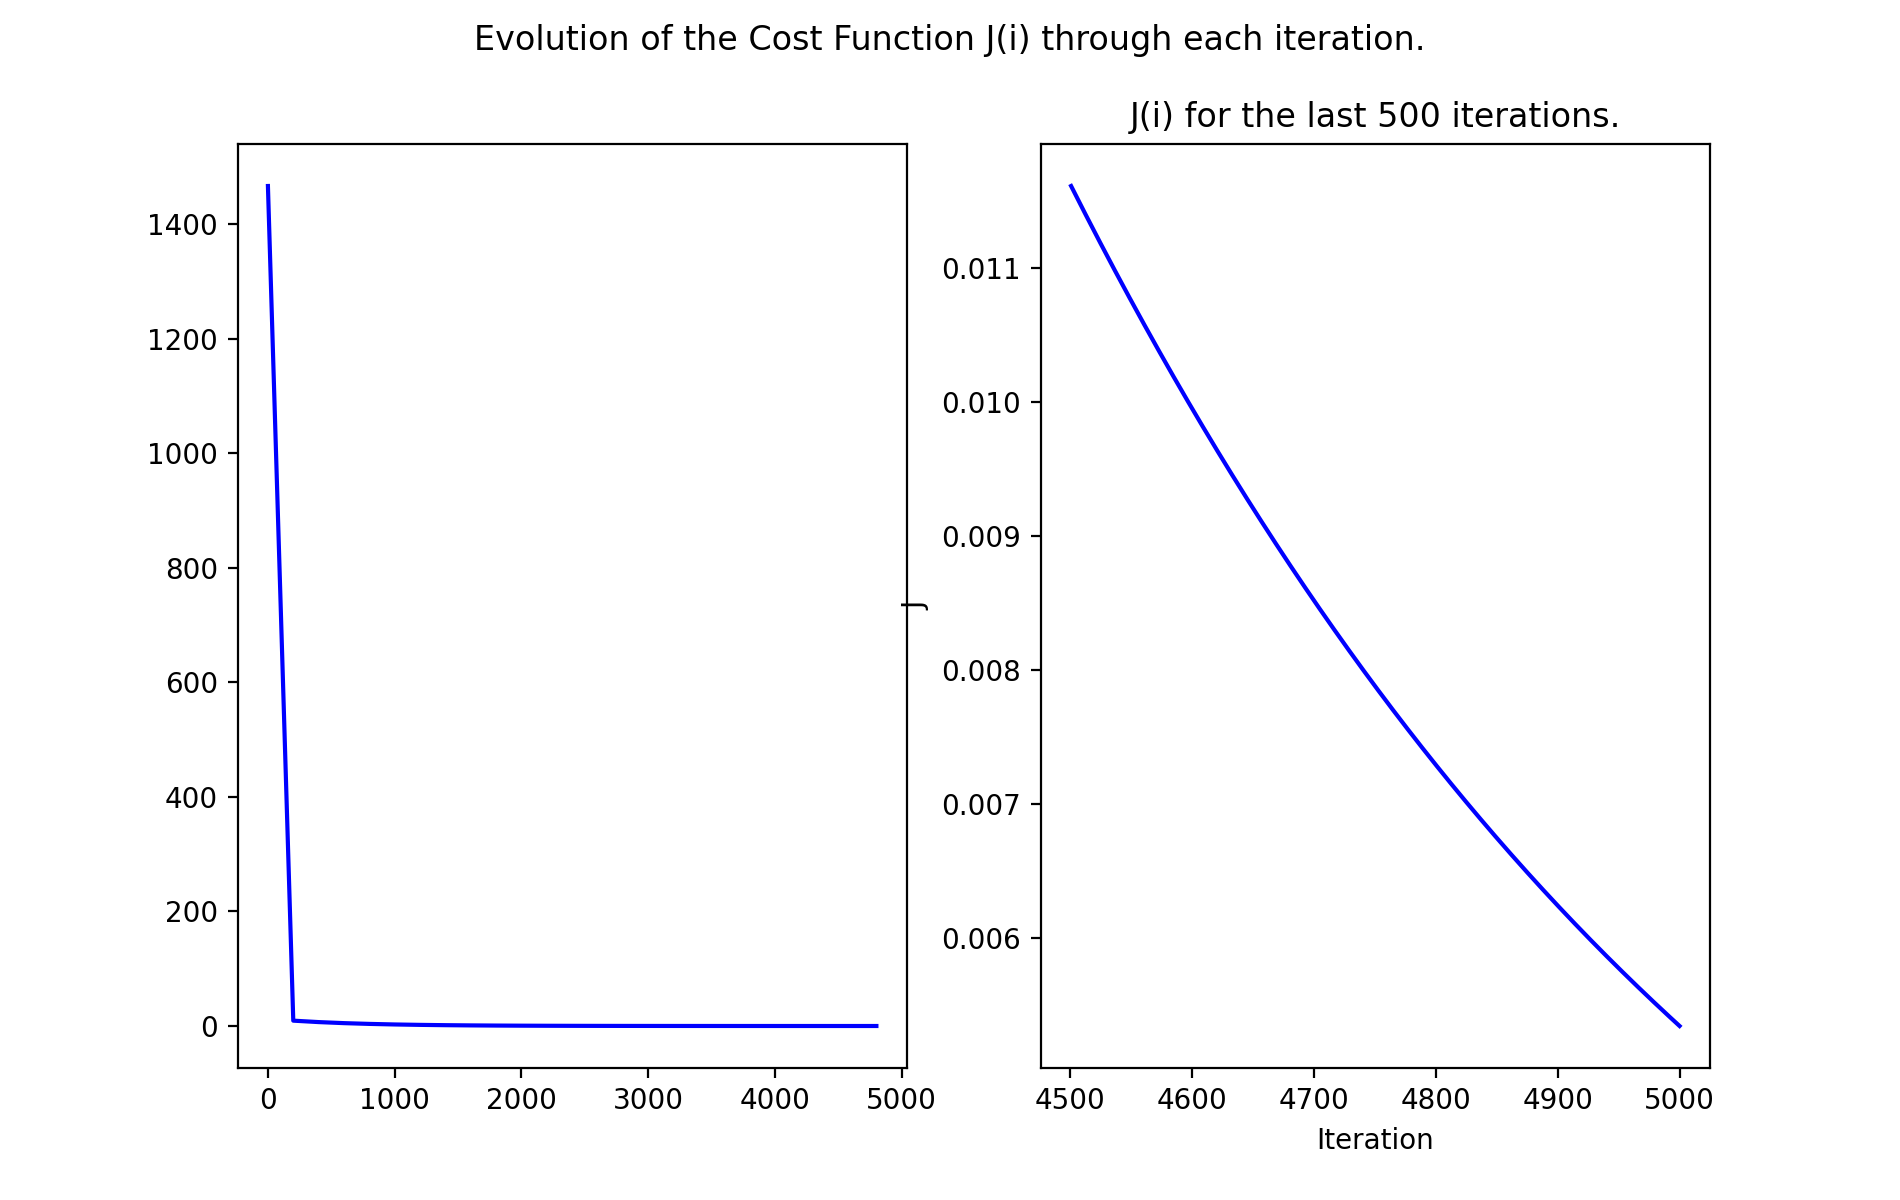

In [6]:
# EXAMPLE 1
w_real = np.array([2])
b_real = 10
print(f"The real solution is w = {w_real.reshape(1,-1)}, b = {b_real:.2f}")    

# Creating a training dataset
X = np.arange(0,40,1).reshape(-1,1)
y = (np.dot(X,w_real)+b_real).reshape(-1,1)

# Initial conditions for the Gradient descent
w = np.array([0.]).reshape(-1,1)
b = 0

# CALLING THE FUNCTION
w,b = gradient_descent(X,y,w,b,3e-3,5000,visual=True,points=25)

The real solution is w = [[37]], b = -20.00
The solution found is w = [[36.98]], b = -19.56. Final cost = 0.02.


<IPython.core.display.Javascript object>


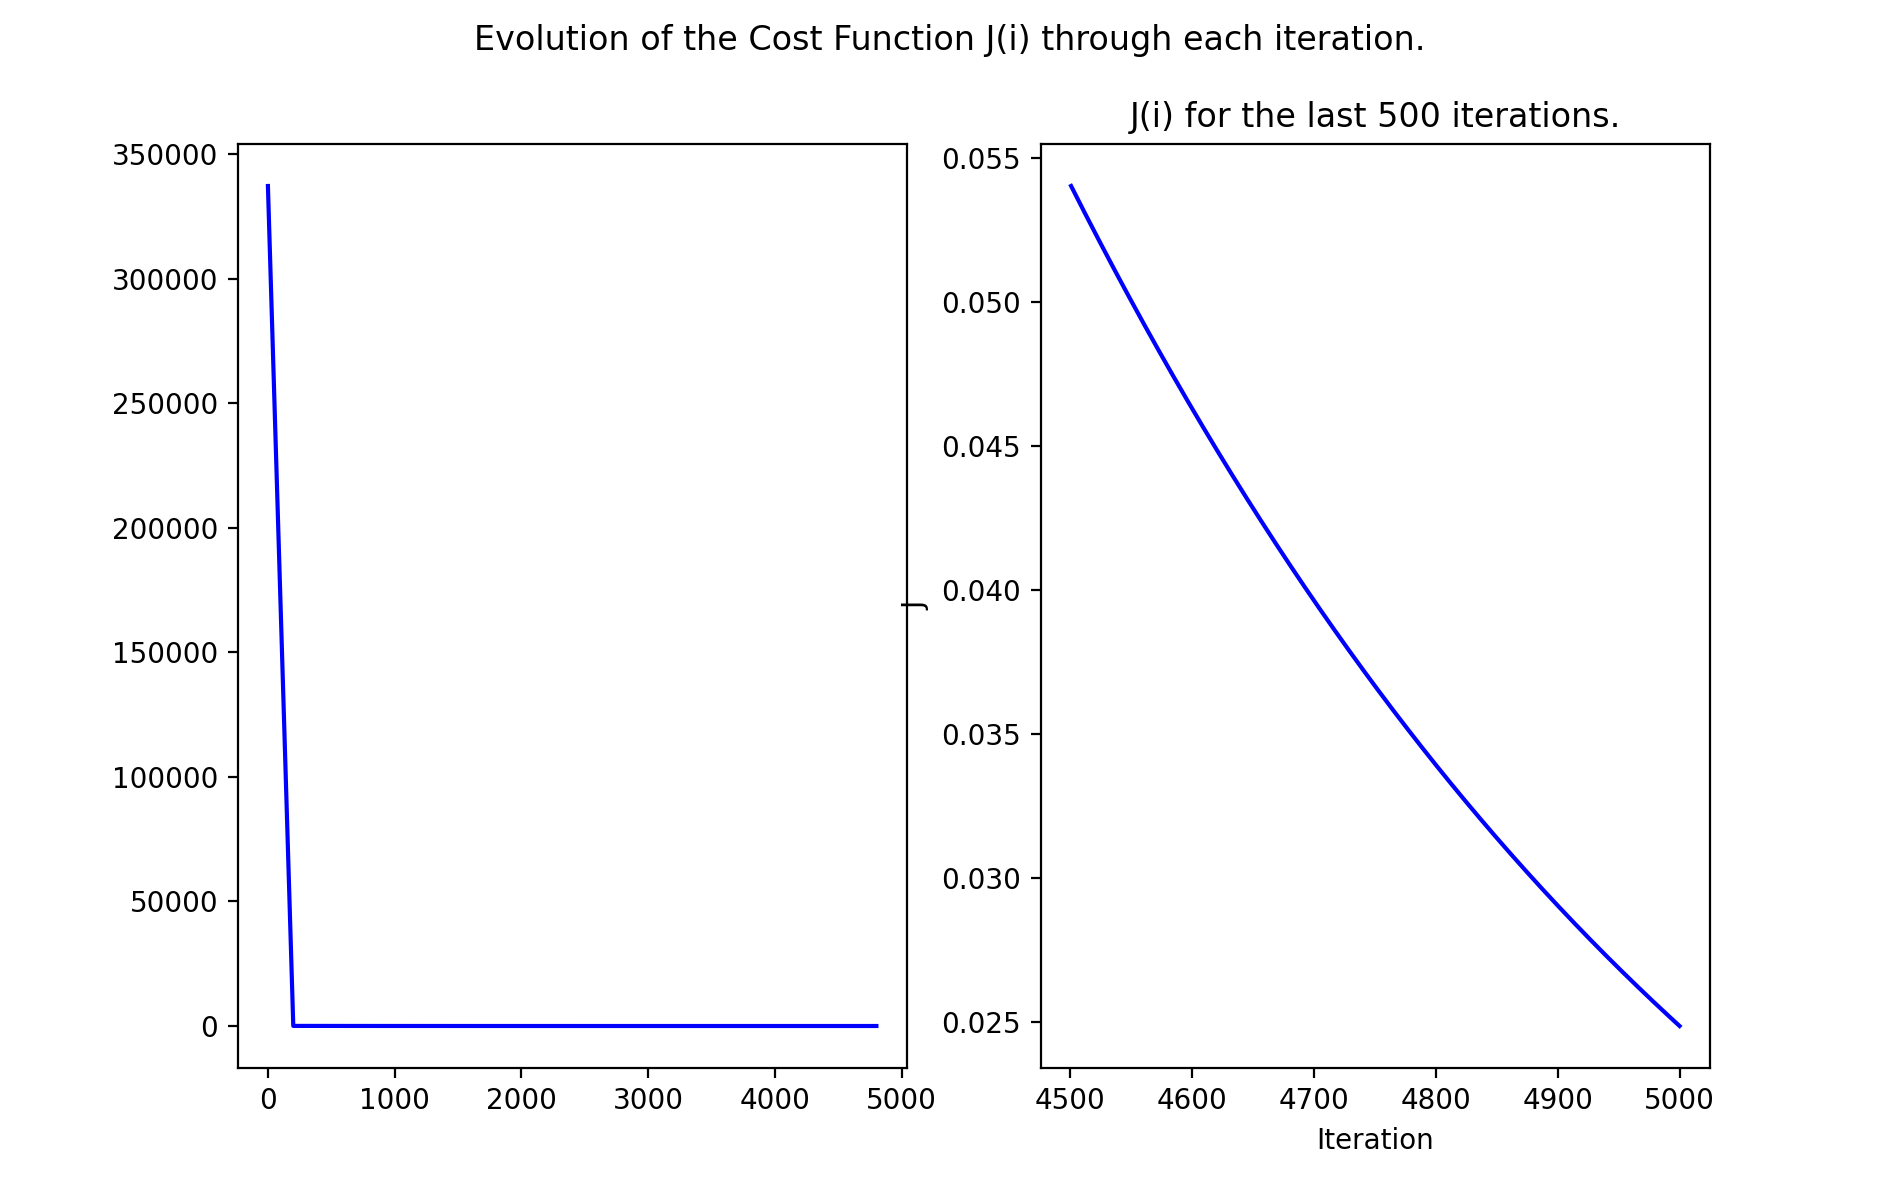

In [7]:
# EXAMPLE 2
w_real = np.array([37])
b_real = -20
print(f"The real solution is w = {w_real.reshape(1,-1)}, b = {b_real:.2f}")    


# Creating a training dataset
X = np.arange(0,40,1).reshape(-1,1)
y = (np.dot(X,w_real)+b_real).reshape(-1,1)

# Initial conditions for the Gradient descent
w = np.array([0.]).reshape(-1,1)
b = 0

# CALLING THE FUNCTION
w,b = gradient_descent(X,y,w,b,3.0e-3,5000,visual=True,points=25)

The real solution is w = [[ 5 -5]], b = -10.00
The solution found is w = [[ 5. -5.]], b = -10.00. Final cost = 0.00.


<IPython.core.display.Javascript object>


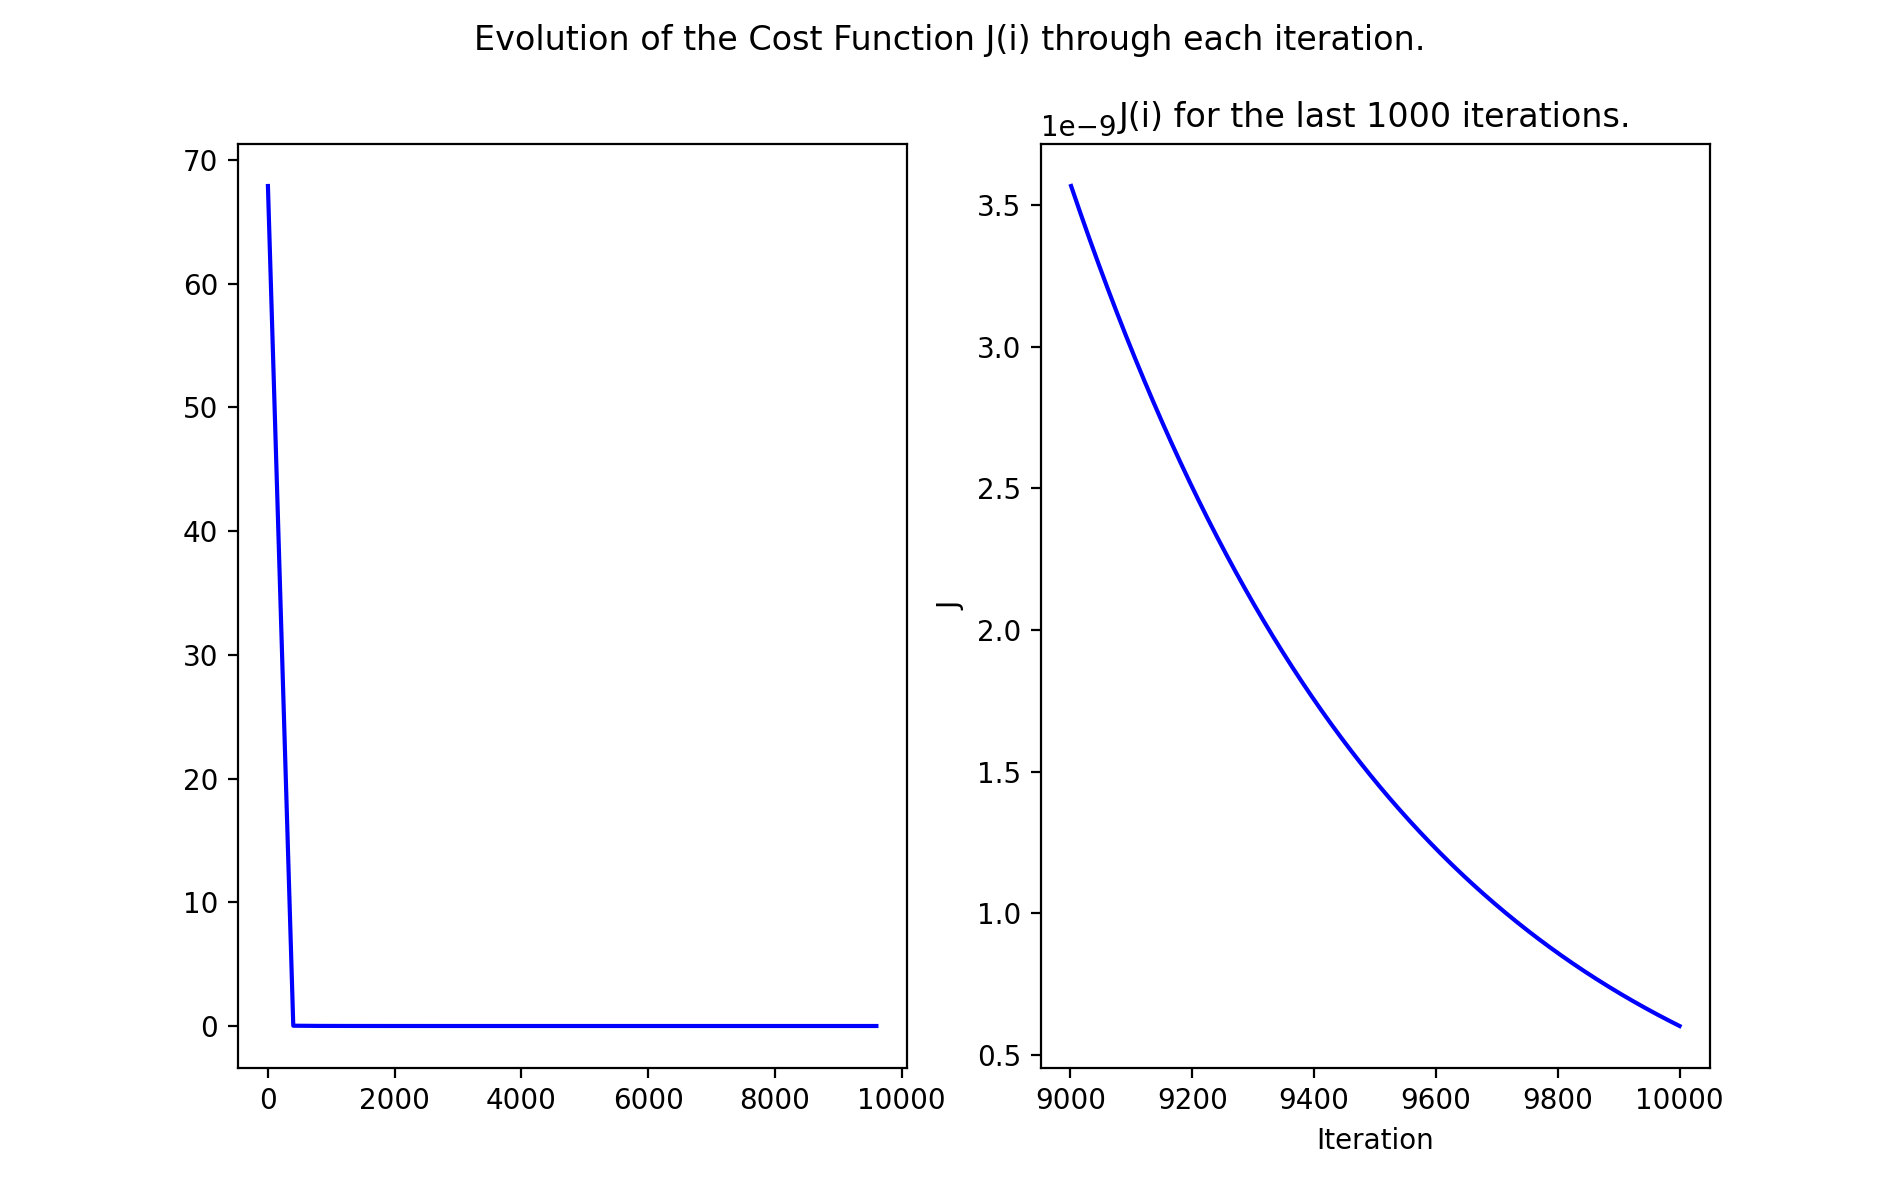

In [8]:
# EXAMPLE 3 (MULTIDIMENSION)
w_real = np.array([5,-5])
b_real = -10
print(f"The real solution is w = {w_real.reshape(1,-1)}, b = {b_real:.2f}")    


# Creating a training dataset
X = np.array([np.random.randint(0,20,20)/20,np.random.randint(30,50,20)/50]).T
y = (np.dot(X,w_real)+b_real).reshape(-1,1)

# Initial conditions for the Gradient descent
w = np.array([0.,0.]).reshape(-1,1)
b = 0

# CALLING THE FUNCTION
w,b = gradient_descent(X,y,w,b,1e-1,10000,visual=True,points=25)